<a href="https://colab.research.google.com/github/DennisCeballos/TF_ClusterCovidPeru/blob/main/SistIntel_PruebasTrabajoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importacion de librerias



In [3]:
import csv
import pandas as pd
import numpy as np
import io
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Carga de archivos
Codigo que solicita subir un archivo csv, utilizamos el archivo "DD_TB_SEGUIM_COVID19" brindado por el profesor Roberto Rodrigez

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving TB_SEGUIM_COVID19_preprocesado.csv to TB_SEGUIM_COVID19_preprocesado.csv
User uploaded file "TB_SEGUIM_COVID19_preprocesado.csv" with length 2617574 bytes


In [5]:
#Guardar los datos del archivo en una variable
filename = list(uploaded.keys())[0]
file_content = uploaded[filename].decode('utf-8')

#Cargar los datos a un DataFrame de Panda
df = pd.read_csv(io.StringIO(file_content))
df.head(100)

,evolucion_alta_1,evolucion_defuncion_1,evolucion_desfavorable_1,evolucion_estacionario_1,evolucion_favorable_1,evolucion_referido_1,con_oxigeno_1,con_ventilacion_1,esta_uci_1,esta_ucin_1,...,evolucion_alta_4,evolucion_defuncion_4,evolucion_desfavorable_4,evolucion_estacionario_4,evolucion_favorable_4,evolucion_referido_4,con_oxigeno_4,con_ventilacion_4,esta_uci_4,esta_ucin_4
0,False,False,True,False,False,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,1.0,0.0,0.0,0.0
1,False,False,False,True,False,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,1.0,0.0,0.0,0.0
2,False,False,True,False,False,False,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,1.0,0.0,0.0,0.0
3,False,False,True,False,False,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,1.0,0.0,0.0,0.0
4,False,False,False,False,True,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,True,False,False,1.0,0.0,0.0,0.0,...,False,True,False,False,False,False,1.0,0.0,0.0,0.0
96,False,False,False,False,True,False,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,0.0,0.0,0.0,0.0
97,False,False,False,True,False,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,0.0,0.0,0.0,0.0
98,False,False,False,True,False,False,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,0.0,0.0,0.0,0.0


#Formato de datos
El archivo cuenta con una tabla que presenta las siguientes columnas:

{ evolucion_alta_1, evolucion_defuncion_1, evolucion_desfavorable_1, evolucion_estacionario_1, evolucion_favorable_1, evolucion_referido_1, con_oxigeno_1, con_ventilacion_1, esta_uci_1, esta_ucin_1 }

Este formato repetido 4 veces. Cada fila representa a un mismo paciente, y este formato repetido 4 veces representa la evolución del estado de este mismo paciente, a su vez de las acciones que se le aplicaron, específicamente: oxigenación, ventilación y UCI o UCIN.


#Normalización de los Datos

Algunas fuentes indican que K-means requiere de una normalización de los datos para tener un resultado más preciso

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
#df_scaled = pd.DataFrame(df)
#df_scaled = df_scaled.replace({True: 1 , False: 0})
print(df_scaled)

[[ 0.          0.          1.81922734 ... -0.13754136 -0.14447602
  -0.18916616]
 [ 0.          0.         -0.54968391 ... -0.13754136 -0.14447602
  -0.18916616]
 [ 0.          0.          1.81922734 ... -0.13754136 -0.14447602
  -0.18916616]
 ...
 [ 0.          0.         -0.54968391 ... -0.13754136 -0.14447602
  -0.18916616]
 [ 0.          0.         -0.54968391 ...  7.27054052 -0.14447602
  -0.18916616]
 [ 0.          0.         -0.54968391 ... -0.13754136 -0.14447602
  -0.18916616]]


#Tecnica de Clustering
Aplicación del método de K-means para clustering

##Determinar el Número Óptimo de Clusters
Técnica del codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

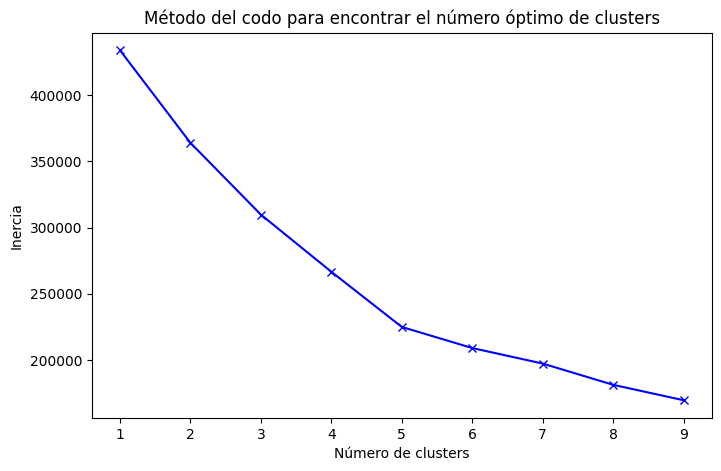

In [7]:
# Lista para almacenar los valores de inercia para cada número de clusters
inertia = []

# Rango de valores para el número de clusters que se va a probar
K = range(1, 10)

# Iterar sobre el rango de valores de K
for k in K:
    # Crear una instancia del modelo KMeans con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Ajustar el modelo KMeans a los datos escalados
    kmeans.fit(df_scaled)

    # Almacenar la inercia del modelo (suma de las distancias cuadradas de las muestras a su centroide más cercano)
    inertia.append(kmeans.inertia_)

# Crear una figura para el gráfico del método del codo
plt.figure(figsize=(8, 5))

# Graficar el número de clusters (K) contra la inercia
plt.plot(K, inertia, 'bx-')

# Etiqueta para el eje X
plt.xlabel('Número de clusters')

# Etiqueta para el eje Y
plt.ylabel('Inercia')

# Título del gráfico
plt.title('Método del codo para encontrar el número óptimo de clusters')

# Mostrar el gráfico
plt.show()


El método del codo indica que **5** clusters es el número óptimo

##Modelo K-means con 5 clusters

In [10]:
#Generar el modelo kmeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

#Agregar los clusters generados al DataFrame principal
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   evolucion_alta_1  evolucion_defuncion_1  evolucion_desfavorable_1  \
0             False                  False                      True   
1             False                  False                     False   
2             False                  False                      True   
3             False                  False                      True   
4             False                  False                     False   

   evolucion_estacionario_1  evolucion_favorable_1  evolucion_referido_1  \
0                     False                  False                 False   
1                      True                  False                 False   
2                     False                  False                 False   
3                     False                  False                 False   
4                     False                   True                 False   

   con_oxigeno_1  con_ventilacion_1  esta_uci_1  esta_ucin_1  ...  \
0            1.0                0.0      

Podemos analizar los resultados para entender la composición de cada cluster.

In [11]:
# Resumen estadístico por cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         evolucion_alta_1  evolucion_defuncion_1  evolucion_desfavorable_1  \
Cluster                                                                      
0                     0.0                    0.0                  0.060997   
1                     0.0                    0.0                  0.742789   
2                     0.0                    0.0                  0.051314   
3                     0.0                    0.0                  0.539326   
4                     0.0                    0.0                  0.273632   

         evolucion_estacionario_1  evolucion_favorable_1  \
Cluster                                                    
0                        0.925122               0.012903   
1                        0.230064               0.026468   
2                        0.190630               0.757313   
3                        0.355805               0.101124   
4                        0.559701               0.164179   

         evolucion_referido_1  c

#Visualización de los Clusters

A pesar de que es imposible hacer un plano en el que se visualicen y se vean 40 variables por sí mismas, se puede *reducir la dimensionalidad* del data set en dos variables. Luego, con estas columnas sí es posible hacer un gráfico.

           PCA1      PCA2  Cluster
0      2.635761 -1.704424        1
1      0.558910 -1.118566        0
2      3.325963 -1.971363        1
3      0.473121 -0.574783        2
4     -0.110931 -0.384643        2
...         ...       ...      ...
12760 -0.336712 -0.453694        0
12761 -2.014289  0.557401        0
12762  0.558910 -1.118566        0
12763  6.215333  8.694458        3
12764  1.282649 -1.542261        0

[12765 rows x 3 columns]


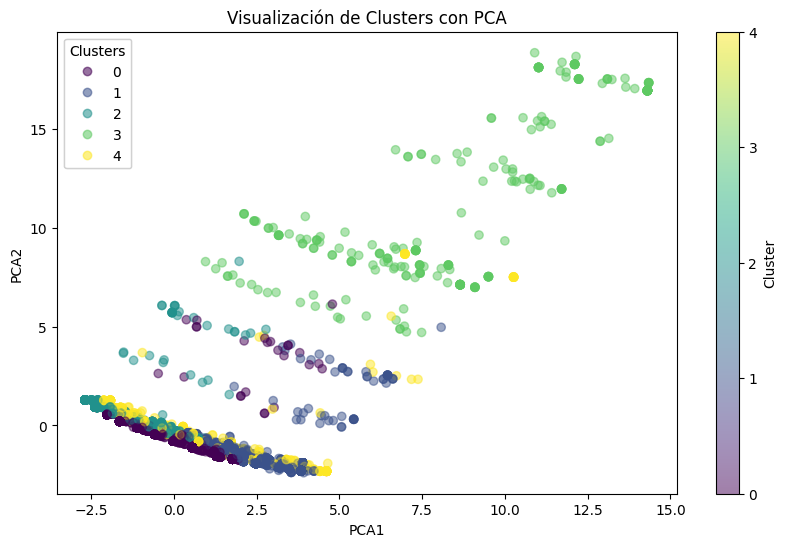

In [12]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Crear un dataframe con las dos componentes principales
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters
print(df_pca)

# Visualizar los clusters
# Visualizar los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualización de Clusters con PCA')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.colorbar(label='Cluster').set_ticks([0, 1, 2, 3, 4])
plt.show()

Para descifrar cuál es el significado de PCA1 y PCA2 se puede realizar el siguiente análisis

In [ ]:
# Obtener las *cargas* de cada columna
loadings = pca.components_.T

# Agregar los resultados a un dataFrame para analizarlo fácilmente
loadings_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2'], index=df.columns[:-1])  # Excluye la columna 'Cluster'
print(loadings_df)

                                  PCA1          PCA2
evolucion_alta_1         -6.699623e-20  2.183396e-20
evolucion_defuncion_1    -3.330538e-21 -5.153760e-20
evolucion_desfavorable_1  2.362589e-01 -1.000800e-01
evolucion_estacionario_1 -4.616836e-02 -3.012973e-02
evolucion_favorable_1    -1.754253e-01  1.309898e-01
evolucion_referido_1      2.980862e-03  1.607629e-04
con_oxigeno_1             2.591137e-01 -1.590177e-01
con_ventilacion_1         1.552879e-01  2.785339e-01
esta_uci_1                1.438812e-01  2.984033e-01
esta_ucin_1               3.306171e-02  1.717790e-04
evolucion_alta_2         -3.273628e-24  3.220271e-23
evolucion_defuncion_2     0.000000e+00 -0.000000e+00
evolucion_desfavorable_2  2.657350e-01 -1.100026e-01
evolucion_estacionario_2 -3.224498e-02 -3.954010e-02
evolucion_favorable_2    -1.998215e-01  1.383032e-01
evolucion_referido_2      5.890948e-03  4.636745e-03
con_oxigeno_2             2.683119e-01 -1.683230e-01
con_ventilacion_2         1.747225e-01  3.1153

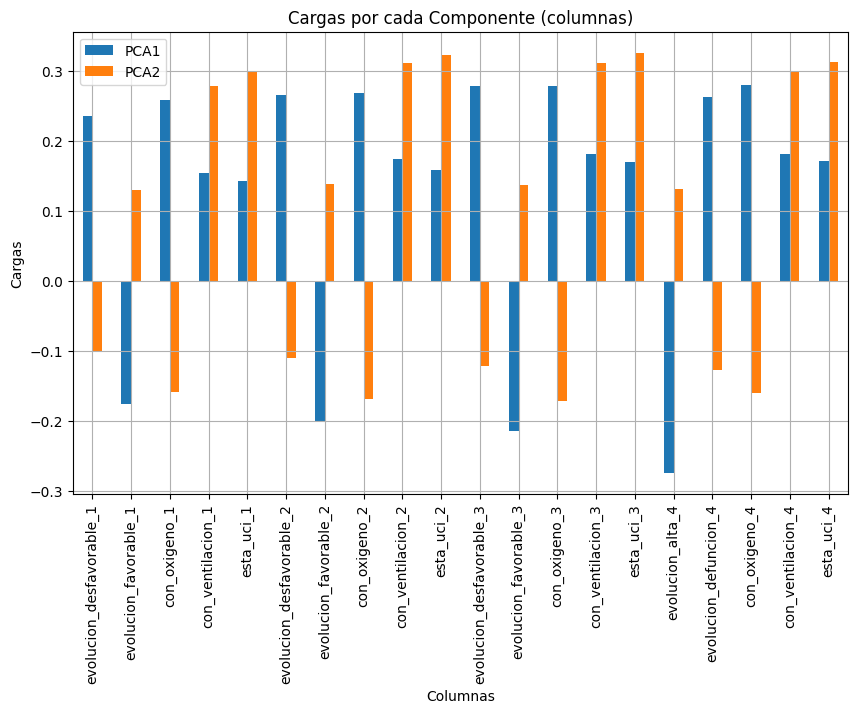

In [ ]:
# Graficar las *cargas*
# Aquí se filtran los datos para que solo se muestren aquellos valores mayores que 0.1 y menores que -0.1
filtrado = loadings_df[ ( loadings_df['PCA1'] > 0.1 ) | (loadings_df['PCA1'] < -0.1) | (loadings_df['PCA2']>0.1) | (loadings_df['PCA2'] < -0.1) ]

filtrado.plot(kind='bar', figsize=(10, 6))
plt.title('Cargas por cada Componente (columnas)')
plt.xlabel('Columnas')
plt.ylabel('Cargas')
plt.legend(['PCA1', 'PCA2'])
plt.grid()
plt.show()

#Validación de los Clusters

In [ ]:
# Validar los clusters utilizando técnicas como:

# - Análisis de silueta
# - Índice de Davies-Bouldin
# - Índice de Calinski-Harabasz

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(df_scaled, clusters)
print("Coeficiente de silueta:", silhouette_avg)

# Calcular el índice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(df_scaled, clusters)
print("Índice de Davies-Bouldin:", davies_bouldin)

# Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_scaled, clusters)
print("Índice de Calinski-Harabasz:", calinski_harabasz)

Coeficiente de silueta: 0.3933378190034025
Índice de Davies-Bouldin: 1.0867628200737358
Índice de Calinski-Harabasz: 2965.761534888045
